In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [90]:
mpl.rc('font',size=10)
mpl.rc("figure", figsize=(8,4))

In [91]:
df = pd.read_csv('gamma-spectroscopy.csv')

In [92]:
df

,Channel,Cs137,A,B,C
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,0,0,0
...,...,...,...,...,...
2043,2043,0,2,0,41
2044,2044,0,5,0,46
2045,2045,0,6,0,36
2046,2046,0,4,1,33


In [93]:
data = df.to_numpy()
col = df.columns

In [94]:
data, col

(array([[   0,    0,    0,    0,    0],
        [   1,    0,    0,    0,    0],
        [   2,    0,    0,    0,    0],
        ...,
        [2045,    0,    6,    0,   36],
        [2046,    0,    4,    1,   33],
        [2047,    0,    4,    1,   33]]),
 Index(['Channel', 'Cs137', 'A', 'B', 'C'], dtype='object'))

In [95]:
channel = data[:,0]
Cs137 = data[:,1]
A = data[:,2]
B = data[:,3]
C = data[:,4]
dataList = [Cs137, A,B,C]

Text(0, 0.5, 'count')

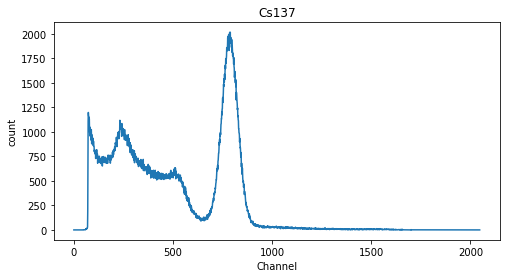

In [96]:
plt.plot(channel, Cs137)
plt.title("Cs137")
plt.xlabel("Channel")
plt.ylabel("count")

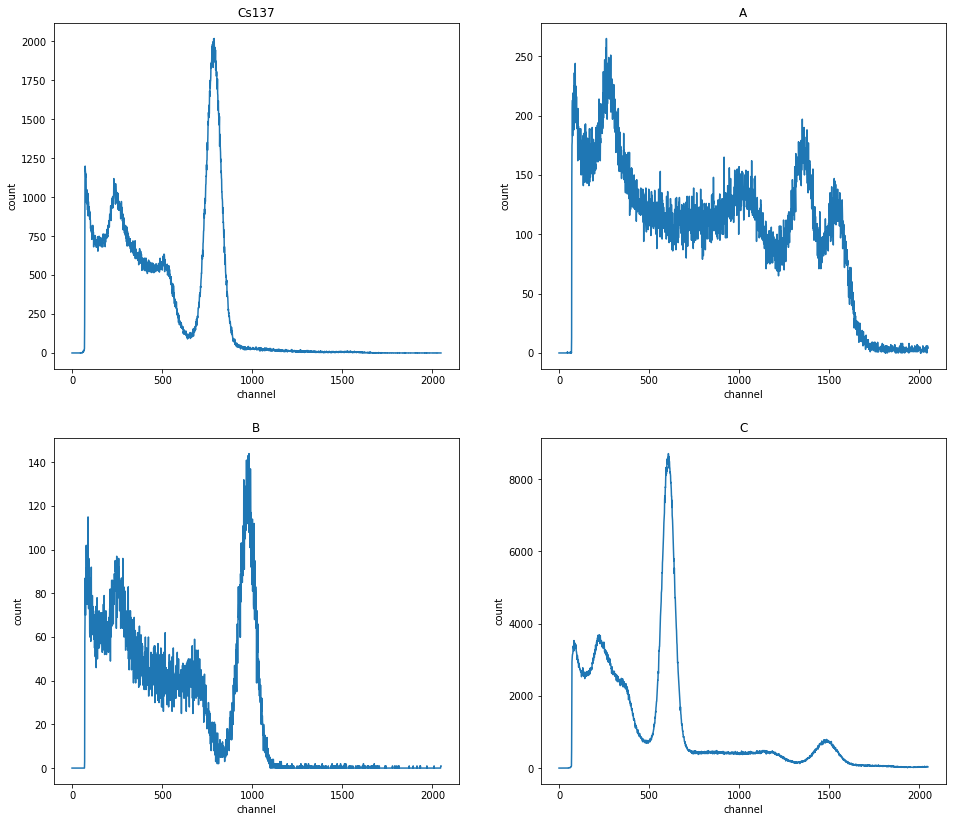

In [97]:
plt.figure(figsize=(16,14))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(channel, dataList[i])
    plt.title(col[i+1])
    plt.xlabel("channel")
    plt.ylabel("count")

## Calibration

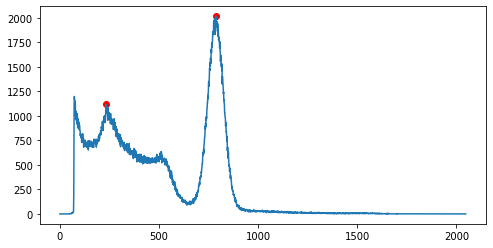

In [98]:
plt.plot(dataList[0])
E_gamma = dataList[0].argmax()
E_backScatter = dataList[0][200:500].argmax() + 200
plt.scatter(E_gamma,dataList[0][E_gamma],color='r')
plt.scatter(E_backScatter,dataList[0][E_backScatter],color='r')

In [99]:
E_backScatter

232

In [100]:
E_gamma

789

In [101]:
def E(channel):
    return 0.8445*channel-11.93

In [102]:
E(232)

183.994

In [103]:
E_list = E(data[:,0])

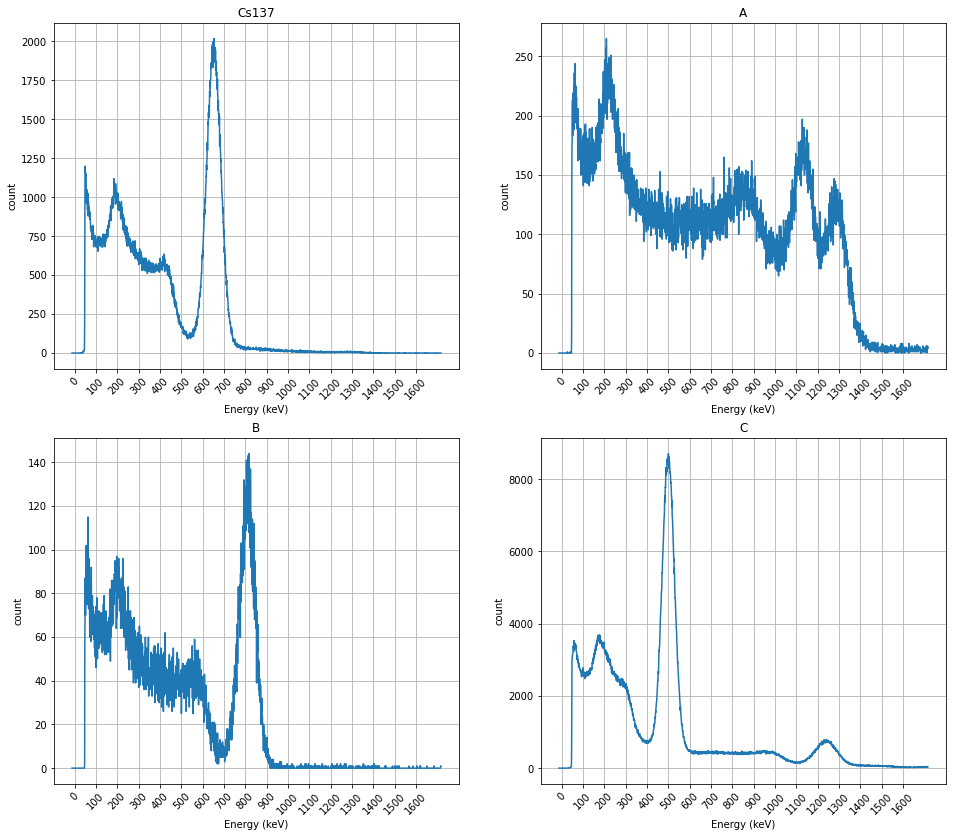

In [112]:
fig = plt.figure(figsize=(16,14))
for i in range(4):
    ax = fig.add_subplot(2,2,i+1)
    ax.set_title(col[i+1])
    ax.set_xlabel("Energy (keV)")
    ax.set_ylabel("count")
    ax.grid('on')
    ax.plot(E_list, dataList[i])
    
    #ax.set_xticks()
    ax.set_xticks(np.arange(0,int(E_list[-1]/100)*100,100))
    ax.tick_params(axis ='x', rotation = 45)
    
fig.savefig('plots.jpg', transparent=False,dpi=700)
    
